In [1]:
#@title Functions to generate Seq2Seq Dataset, one hot encode / decode Input & Output Sequences
#@title Import Libraries
from random import randint
from numpy import array
from numpy import argmax
import keras.backend as K
import tensorflow as tf
from tensorflow.keras import models
from numpy import array_equal
import keras
import numpy as np
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Bidirectional
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import Input
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import RepeatVector
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Lambda
from tensorflow.keras import backend as K

tf.keras.backend.set_floatx('float64')


#@title Functions to generate Seq2Seq Dataset, one hot encode / decode Input & Output Sequences


# generate a sequence of random integers
def generate_sequence(length, n_unique):
	return [randint(1, n_unique-1) for _ in range(length)]

# one hot encode sequence
def one_hot_encode(sequence, n_unique):
	encoding = list()
	for value in sequence:
		vector = [0 for _ in range(n_unique)]
		vector[value] = 1
		encoding.append(vector)
	return array(encoding)

# decode a one hot encoded string
def one_hot_decode(encoded_seq):
      return [argmax(vector) for vector in encoded_seq]

  # prepare encoder data for the Encoder-Decoder training
def get_encoder_triple(time_steps,vocabulary_size,verbose= False):
  # generate random sequence
    sequence_in = generate_sequence(time_steps, vocabulary_size)

    encoder_in = sequence_in.copy()





    decoder_out = sequence_in[::-1]

    decoder_in = decoder_out.copy()
    decoder_in.insert(0,0)
    decoder_in.pop()

    # one hot encode
    X_encoder_in = one_hot_encode(encoder_in, vocabulary_size)
    X_decoder_in = one_hot_encode(decoder_in, vocabulary_size)
    y_decoder_out = one_hot_encode(decoder_out, vocabulary_size)
    # reshape as 3D
    X_encoder_in = X_encoder_in.reshape((1, X_encoder_in.shape[0], X_encoder_in.shape[1]))
    X_decoder_in = X_decoder_in.reshape((1, X_decoder_in.shape[0], X_decoder_in.shape[1]))
    y_decoder_out = y_decoder_out.reshape((1, y_decoder_out.shape[0], y_decoder_out.shape[1]))

    if(verbose):
        print('\nSample X_encoder_in X_decoder_in and y_decoder_out')
        print('\nIn raw format:')
        print('X_encoder_in=%s, X_decoder_in=%s, y_decoder_out=%s' % 
          (one_hot_decode(X_encoder_in[0]), one_hot_decode(X_decoder_in[0]), 
           one_hot_decode(y_decoder_out[0])))
        print('\nIn one_hot_encoded format:')
        print('X_encoder_in=%s' % (X_encoder_in[0]))
        print('X_decoder_in=%s' % (X_decoder_in[0]))
        print('y_decoder_out=%s' % (y_decoder_out[0]))
    return [array(X_encoder_in), array(X_decoder_in), array(y_decoder_out)]


def create_encoder_dataset(train_size, test_size, time_steps,vocabulary_size, verbose= False):

    X_encoder_in = list()
    X_decoder_in = list()
    y_decoder_out = list()

    for _ in range(train_size):
        triple=get_encoder_triple(time_steps,vocabulary_size) 
        X_encoder_in.append(triple[0])
        X_decoder_in.append(triple[1])
        y_decoder_out.append(triple[2])

    X_encoder_in= array(X_encoder_in).squeeze()
    X_decoder_in= array(X_decoder_in).squeeze()
    y_decoder_out= array(y_decoder_out).squeeze()
    if(verbose):
        print('\nGenerated sequence datasets as follows')
        print('X_encoder_in.shape: ', X_encoder_in.shape)
        print('X_decoder_in.shape: ', X_decoder_in.shape)
        print('y_decoder_out.shape: ', y_decoder_out.shape)
        print('Sample sequences in raw format:')

        print('X_encoder_in: \n', one_hot_decode(X_encoder_in[0]))
        print('X_decoder_in: \n', one_hot_decode(X_decoder_in[0]))
        print('y_decoder_out: \n',one_hot_decode(y_decoder_out[0]))

        print('Sample sequences in one-hot encoded format:')
        print('X_encoder_in: \n', X_encoder_in[0])
        print('X_decoder_in: \n', X_decoder_in[0])
        print('y_decoder_out: \n', y_decoder_out[0])

    return X_encoder_in,X_decoder_in, y_decoder_out

In [2]:
#@title Configure problem

n_timesteps_in =   4#@param {type:"integer"}
#each input sample has 4 values

n_features = 10   #@param {type:"integer"}
#each value is one_hot_encoded with 10 0/1
#n_timesteps_out = 2  #@param {type:"integer"}
#each output sample has 2 values padded with 0

# generate random sequence
#X,y = get_reversed_pairs(n_timesteps_in,  n_features, verbose=True)
# generate datasets
train_size= 5000 #@param {type:"integer"}
test_size = 100  #@param {type:"integer"}

encoder_input_data, decoder_input_data, decoder_predicted_data=\
create_encoder_dataset(train_size, test_size, n_timesteps_in,n_features , verbose=True)



Generated sequence datasets as follows
X_encoder_in.shape:  (5000, 4, 10)
X_decoder_in.shape:  (5000, 4, 10)
y_decoder_out.shape:  (5000, 4, 10)
Sample sequences in raw format:
X_encoder_in: 
 [2, 4, 7, 5]
X_decoder_in: 
 [0, 5, 7, 4]
y_decoder_out: 
 [5, 7, 4, 2]
Sample sequences in one-hot encoded format:
X_encoder_in: 
 [[0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 1 0 0 0 0]]
X_decoder_in: 
 [[1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 1 0 0 0 0 0]]
y_decoder_out: 
 [[0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]]


In [3]:
# encoder part
encoder_inputs = Input(shape=(n_timesteps_in,n_features))
encoder_lstm = LSTM(16,return_state = True)
enoder_outputs,state_h,state_c = encoder_lstm(encoder_inputs)

encoder_states = [state_h,state_c]

# decoder part
decoder_inputs = Input(shape=(None,n_features),name='decoder_inputs') # none means it can be any no. of timesteps
decoder_lstm = LSTM(16,return_state=True,return_sequences=True,name='decoder_lstm')
decoder_outputs,_,_ = decoder_lstm(decoder_inputs,
                                   initial_state=encoder_states)

decoder_dense = Dense(n_features,activation = 'softmax',name='decoder_dense')
decoder_outputs = decoder_dense(decoder_outputs)

model_encoder_training = Model([encoder_inputs,decoder_inputs],decoder_outputs,name = 'model_encoder_training')

model_encoder_training.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_encoder_training.summary()
plot_model(model_encoder_training, show_shapes=True)

Model: "model_encoder_training"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 4, 10)]      0                                            
__________________________________________________________________________________________________
decoder_inputs (InputLayer)     [(None, None, 10)]   0                                            
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 16), (None,  1728        input_1[0][0]                    
__________________________________________________________________________________________________
decoder_lstm (LSTM)             [(None, None, 16), ( 1728        decoder_inputs[0][0]             
                                                                 lstm[0][1]  

In [4]:
"""# Run training
model_encoder_training.fit([encoder_input_data, decoder_input_data], decoder_predicted_data,
          batch_size=32,
          epochs=50,
          validation_split=0.2)"""

'# Run training\nmodel_encoder_training.fit([encoder_input_data, decoder_input_data], decoder_predicted_data,\n          batch_size=32,\n          epochs=50,\n          validation_split=0.2)'

training for  50  epochs begins with EarlyStopping(monitor= val_loss, patience= 5 )....
Epoch 1/50
141/141 - 3s - loss: 2.1633 - accuracy: 0.2086 - val_loss: 1.9275 - val_accuracy: 0.3270
Epoch 2/50
141/141 - 2s - loss: 1.6606 - accuracy: 0.3898 - val_loss: 1.4629 - val_accuracy: 0.4465
Epoch 3/50
141/141 - 2s - loss: 1.2823 - accuracy: 0.5383 - val_loss: 1.0889 - val_accuracy: 0.6745
Epoch 4/50
141/141 - 2s - loss: 0.9201 - accuracy: 0.7576 - val_loss: 0.7565 - val_accuracy: 0.8525
Epoch 5/50
141/141 - 2s - loss: 0.6363 - accuracy: 0.8947 - val_loss: 0.5251 - val_accuracy: 0.9310
Epoch 6/50
141/141 - 2s - loss: 0.4497 - accuracy: 0.9508 - val_loss: 0.3796 - val_accuracy: 0.9640
Epoch 7/50
141/141 - 2s - loss: 0.3286 - accuracy: 0.9729 - val_loss: 0.2890 - val_accuracy: 0.9785
Epoch 8/50
141/141 - 2s - loss: 0.2497 - accuracy: 0.9840 - val_loss: 0.2188 - val_accuracy: 0.9860
Epoch 9/50
141/141 - 2s - loss: 0.1955 - accuracy: 0.9900 - val_loss: 0.1785 - val_accuracy: 0.9890
Epoch 10/50


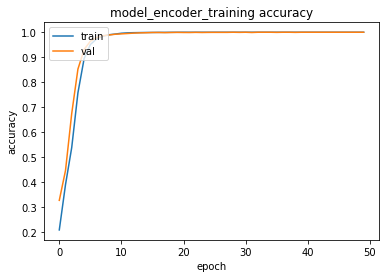

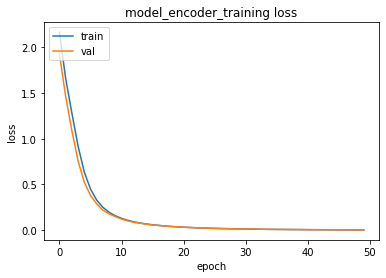

10 examples from test data...
Input          Expected       Predicted         T/F
[2, 4, 7, 5]   [5, 7, 4, 2]   [5, 7, 4, 2]   True
[1, 2, 1, 3]   [3, 1, 2, 1]   [3, 1, 2, 1]   True
[6, 6, 7, 2]   [2, 7, 6, 6]   [2, 7, 6, 6]   True
[8, 9, 1, 1]   [1, 1, 9, 8]   [1, 1, 9, 8]   True
[4, 9, 7, 8]   [8, 7, 9, 4]   [8, 7, 9, 4]   True
[7, 7, 2, 3]   [3, 2, 7, 7]   [3, 2, 7, 7]   True
[3, 9, 6, 6]   [6, 6, 9, 3]   [6, 6, 9, 3]   True
[4, 8, 9, 1]   [1, 9, 8, 4]   [1, 9, 8, 4]   True
[9, 3, 7, 7]   [7, 7, 3, 9]   [7, 7, 3, 9]   True
[6, 8, 3, 2]   [2, 3, 8, 6]   [2, 3, 8, 6]   True
Accuracy:  1.0


In [5]:
#@title Function to Train & Test  given model (Early Stopping monitor 'val_loss')
def train_test(model, X_train, y_train , X_test, 	y_test, epochs=500, batch_size=32, patience=5,verbose=0):
	# patient early stopping
	#es = EarlyStopping(monitor='val_accuracy', mode='max', min_delta=1, patience=20)
	es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=patience)
	# train model
	print('training for ',epochs,' epochs begins with EarlyStopping(monitor= val_loss, patience=',patience,')....')
	history=model.fit(X_train, y_train, validation_split= 0.1, epochs=epochs,batch_size=batch_size, verbose=verbose, callbacks=[es])
	print(epochs,' epoch training finished...')

	# report training
	# list all data in history
	#print(history.history.keys())
	# evaluate the model
	_, train_acc = model.evaluate(X_train, y_train, batch_size=batch_size, verbose=0)
	_, test_acc = model.evaluate(X_test, 	y_test, batch_size=batch_size, verbose=0)
	print('\nPREDICTION ACCURACY (%):')
	print('Train: %.3f, Test: %.3f' % (train_acc*100, test_acc*100))
	# summarize history for accuracy
	plt.plot(history.history['accuracy'])
	plt.plot(history.history['val_accuracy'])
	plt.title(model.name+' accuracy')
	plt.ylabel('accuracy')
	plt.xlabel('epoch')
	plt.legend(['train', 'val'], loc='upper left')
	plt.show()
	# summarize history for loss
	plt.plot(history.history['loss'])
	plt.plot(history.history['val_loss'])
	plt.title(model.name+' loss')
	plt.ylabel('loss')
	plt.xlabel('epoch')
	plt.legend(['train', 'val'], loc='upper left')
	plt.show()




  
	# spot check some examples
	space = 3*len(one_hot_decode(y_test[0]))
	print('10 examples from test data...')
	print('Input',' '*(space-4) ,'Expected',' '*(space-7) ,
	      'Predicted',' '*(space-5) ,'T/F')
	correct =0 
	sampleNo =  10

	predicted= model.predict(X_test[:sampleNo], batch_size=batch_size)
	for sample in range(0,sampleNo):
		if (one_hot_decode(y_test[sample])== one_hot_decode(predicted[sample])):
			correct+=1
		print( one_hot_decode(X_test[0][sample]), ' ', 
					one_hot_decode(y_test[sample]),' ', one_hot_decode(predicted[sample]),
					' ',one_hot_decode(y_test[sample])== one_hot_decode(predicted[sample]))
	print('Accuracy: ', correct/sampleNo)
	
train_test(model_encoder_training, [encoder_input_data, decoder_input_data], decoder_predicted_data , [encoder_input_data, decoder_input_data], decoder_predicted_data, epochs=50, batch_size=32, patience=5,verbose=2)